# Sentiment Analysis of New York Times Articles (2022)

This notebook performs sentiment analysis on New York Times article titles from 2022, analyzing sentiment trends throughout the year.

## Table of Contents
1. Data Collection
2. Data Storage
3. Sentiment Analysis
4. Visualization
5. Semantic Analysis

# Imports


In [1]:
import os

from helper_functions import *
from database_functions import *
from sentiment_analysis_helpers import *
from sentiment_analysis_visualisation import *


C:\Users\zecab\Repositories\Sentiment_Analysis_NYT\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load environment variables

In [2]:
# NYT API configuration
from dotenv import load_dotenv

load_dotenv()
API_KEY = os.getenv("API_KEY")

BASE_URL = "https://api.nytimes.com/svc/search/v2/articlesearch.json"

In [3]:

# Fetch articles for March 2022
fetch_articles_by_week(year=2022, week=10, pages=1, api_key=API_KEY)

Sleeping...


['Oregon and Washington State, known for cautious Covid strategies, lift their statewide mask mandates.',
 'The Ukrainian mayor who labeled Russian soldiers ‘occupiers’ has not been seen since Friday.',
 'In videos, Zelensky makes his case for Ukraine.',
 '19 surrogate babies are trapped in a Kyiv basement, kept alive by nannies.',
 'With bombings and a funeral, the war arrives in Ukraine’s west.',
 'In western Ukraine, a village buries one of its own.',
 'The F.D.A. has extended the shelf life of Johnson & Johnson’s Covid shot by three months.',
 'The Russians Might Have Expected a Warm Welcome. Instead the Mayor Labeled Them ‘Occupiers.’',
 'Across Europe, pandemic fears give way to a rush for bomb shelters.',
 'A dating app becomes a lifeline while fleeing Ukraine.']

In [4]:
create_table()

Creating table article_titles...


In [3]:
insert_articles_for_year_in_db(2022, API_KEY)


Inserting articles for year 2022, weeks 1 to 52...
Sleeping...
Week 1 done.
Sleeping...
Week 2 done.
Sleeping...
Week 3 done.
Sleeping...
Week 4 done.
Sleeping...
Week 5 done.
Sleeping...
Week 6 done.
Sleeping...
Week 7 done.
Sleeping...
Week 8 done.
Rate limit hit (429). Retrying in 1 seconds...
Rate limit hit (429). Retrying in 2 seconds...
Rate limit hit (429). Retrying in 4 seconds...
Sleeping...
Week 9 done.
Sleeping...
Week 10 done.
Sleeping...
Week 11 done.
Sleeping...
Week 12 done.
Sleeping...
Week 13 done.
Rate limit hit (429). Retrying in 1 seconds...
Rate limit hit (429). Retrying in 2 seconds...
Rate limit hit (429). Retrying in 4 seconds...
Sleeping...
Week 14 done.
Sleeping...
Week 15 done.
Sleeping...
Week 16 done.
Sleeping...
Week 17 done.
Sleeping...
Week 18 done.
Rate limit hit (429). Retrying in 1 seconds...
Rate limit hit (429). Retrying in 2 seconds...
Rate limit hit (429). Retrying in 4 seconds...
Rate limit hit (429). Retrying in 8 seconds...
Sleeping...
Week 19 

In [4]:
df = load_articles_from_db(db_path='nyt_articles.db')

In [5]:
# Initialize sentiment analyzer
sentiment_analyzer = initialize_sentiment_analyzer()

Device set to use cpu


In [6]:
df['sentiment_score'] = df['title'].apply(lambda text: get_sentiment_score(sentiment_analyzer, text))

In [27]:
def get_sentiment_score(sentiment_analyzer, text):
    result = sentiment_analyzer(text)
    return result[0]['score'] if result[0]['label'] == 'POSITIVE' else -result[0]['score']

In [7]:
df

,id,title,year,month,week,sentiment_score
0,1,The number of New York State hospitals that mu...,2022,1,1,-0.785033
1,2,Trial Looms After Seaside Gathering of Chinese...,2022,1,1,0.793971
2,3,Chicago’s mayor rejects union’s terms for retu...,2022,1,1,-0.995695
3,4,Scattered protests against pandemic policies p...,2022,1,1,-0.986310
4,5,Can you get the flu and Covid at the same time?,2022,1,1,-0.999322
...,...,...,...,...,...,...
515,516,"In his spiritual will, Benedict offers final t...",2022,12,52,0.999719
516,517,Arrangements begin for Benedict’s funeral.,2022,12,52,0.991335
517,518,‘I just don’t have words.’ Kyiv residents expr...,2022,12,52,-0.996786
518,519,"On the last day of the year, the two warring s...",2022,12,52,0.766178


In [8]:
# Calculate monthly averages
monthly_sentiment = df.groupby('month')['sentiment_score'].mean().reset_index()

In [17]:
weekly_sentiment = df.groupby(['year','month', 'week'])['sentiment_score'].mean().reset_index()

In [18]:
weekly_sentiment

,year,month,week,sentiment_score
0,2022,1,1,-0.599872
1,2022,1,2,-0.378864
2,2022,1,3,-0.538015
3,2022,1,4,-0.594196
4,2022,1,5,-0.767459
5,2022,2,6,0.016017
6,2022,2,7,0.131618
7,2022,2,8,-0.339779
8,2022,2,9,-0.564263
9,2022,3,10,-0.189755


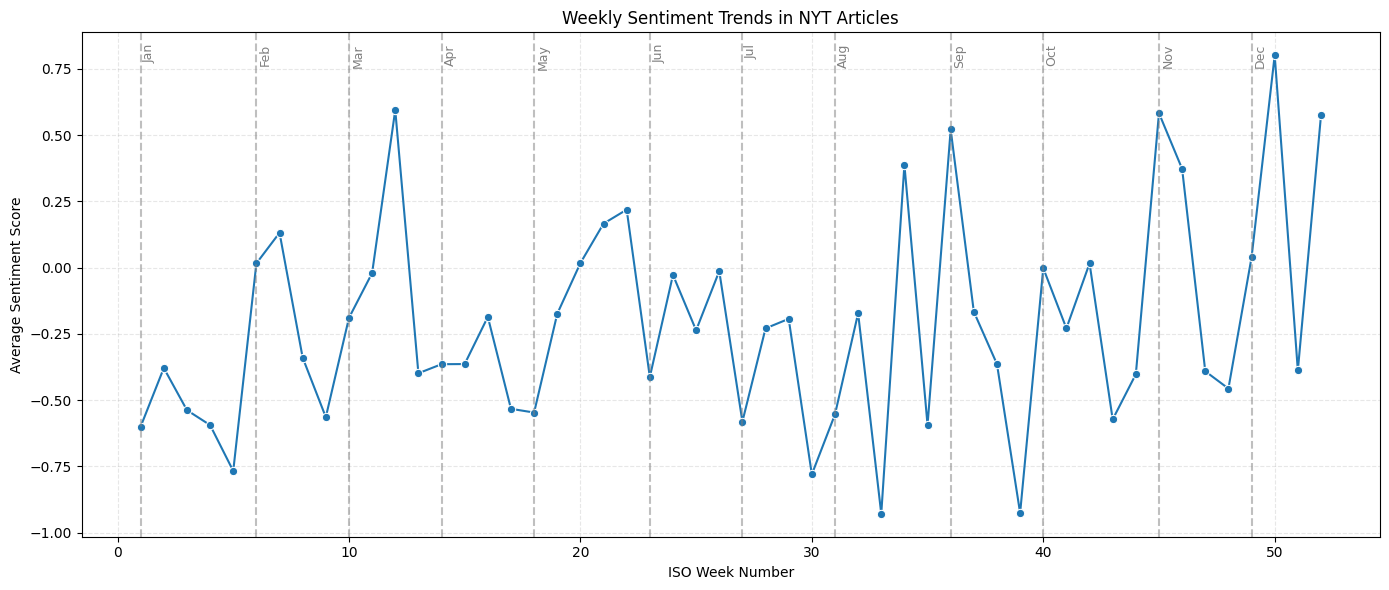

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_weekly_sentiment(weekly_sentiment):
    """
    Expects a DataFrame with columns: 'year', 'week' (int), 'sentiment_score' (float), and 'month' (float or int)
    """
    plt.figure(figsize=(14, 6))
    sns.lineplot(data=weekly_sentiment, x='week', y='sentiment_score', marker='o')

    # Add vertical lines for month changes
    last_month = None
    for i, row in weekly_sentiment.iterrows():
        current_month = int(row['month'])  # Ensure it's an int
        current_year = int(row['year'])
        current_week = row['week']
        if current_month != last_month:
            plt.axvline(x=current_week, color='gray', linestyle='--', alpha=0.5)
            month_label = pd.to_datetime(f"{current_year}-{current_month:02d}-01").strftime('%b')
            plt.text(current_week + 0.1,
                     plt.ylim()[1] * 0.95,
                     month_label,
                     rotation=90,
                     verticalalignment='top',
                     fontsize=9,
                     color='gray')
            last_month = current_month

    plt.title('Weekly Sentiment Trends in NYT Articles')
    plt.xlabel('ISO Week Number')
    plt.ylabel('Average Sentiment Score')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

plot_weekly_sentiment(weekly_sentiment)

In [9]:
monthly_sentiment

,month,sentiment_score
0,1,-0.575681
1,2,-0.189102
2,3,-0.003522
3,4,-0.361769
4,5,-0.063812
5,6,-0.172554
6,7,-0.446023
7,8,-0.372308
8,9,-0.233872
9,10,-0.238006


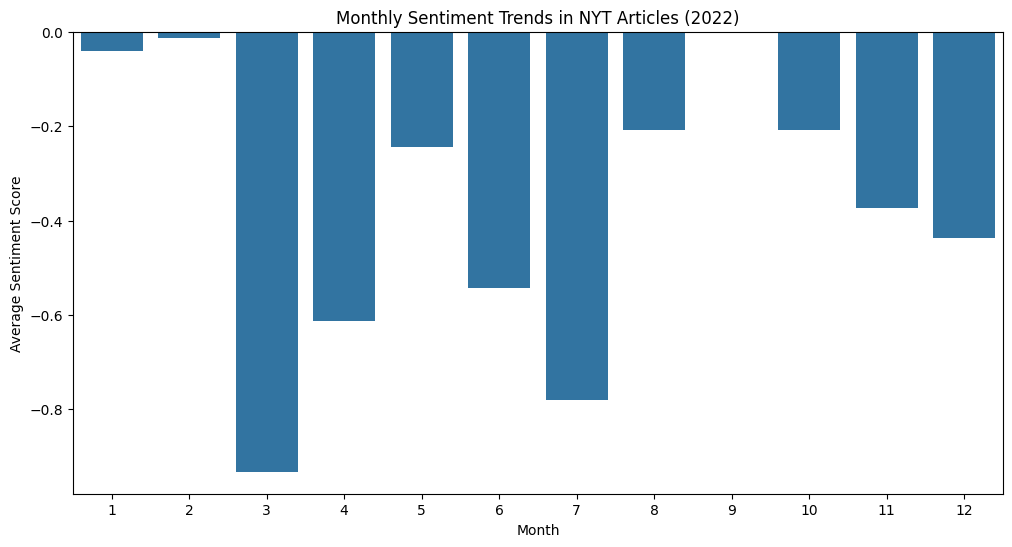

In [33]:
plot_monthly_sentiment(monthly_sentiment)

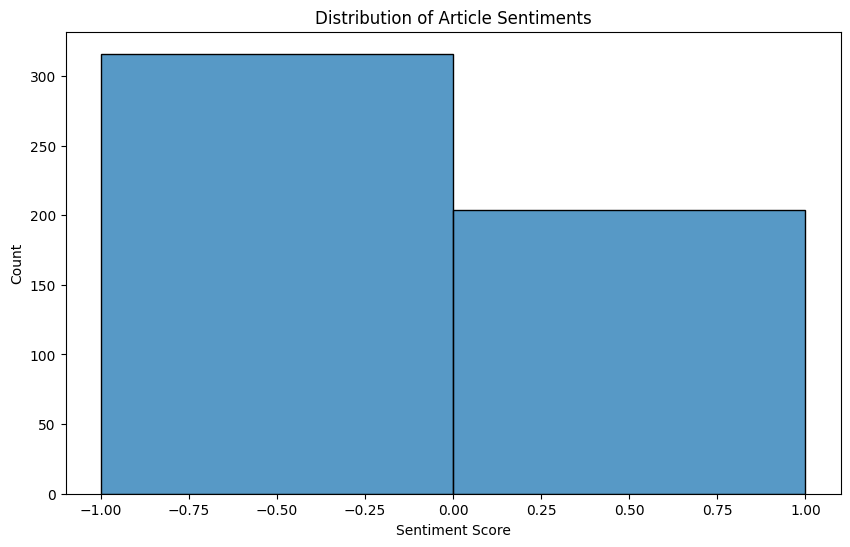

In [10]:
plot_sentiment_distribution(df)

## Conclusion

This analysis reveals patterns in sentiment across NYT articles throughout 2022. The visualizations show:
1. Monthly trends in article sentiment
2. Overall distribution of positive vs negative articles
3. Semantic relationships between article titles

Note: To use this notebook, replace the `API_KEY` variable with your actual NYT API key.